# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Monti

Student name: Sebastiano
    
ID: 2052399

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2052399
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 1000
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

cond = freqs < 10
while np.any(cond) == True:
    X = X[permutation]
    y = y[permutation]
    X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
    y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]
    labels, freqs = np.unique(y_train, return_counts=True)
    cond = freqs < 10

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [107 119  85  98 114 108  89  95 102  83]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


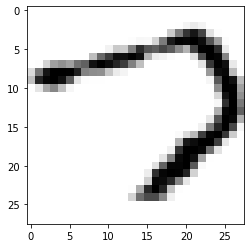

LABEL: 3
INPUT:


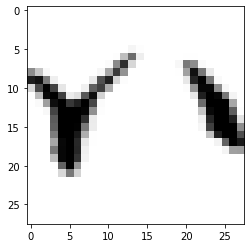

LABEL: 5
INPUT:


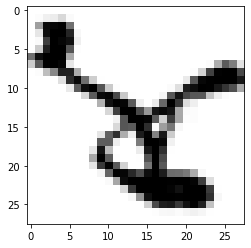

LABEL: 9
INPUT:


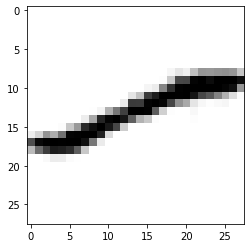

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM
clf = GridSearchCV(SVC(kernel='linear'), parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
print(clf.cv_results_["mean_test_score"])

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.01}
Score with best parameters:
0.784
All scores on the grid:
[0.784 0.775 0.771 0.771]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
clf = GridSearchCV(SVC(kernel='poly', degree=2), parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
print(clf.cv_results_["mean_test_score"])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 1}
Score with best parameters:
0.8160000000000001

All scores on the grid:
[0.119 0.812 0.816 0.547 0.816 0.816 0.812 0.816 0.816]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

clf = GridSearchCV(SVC(kernel='poly', degree=degree), parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
print(clf.cv_results_["mean_test_score"])

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 1}
Score with best parameters:
0.7749999999999999

All scores on the grid:
[0.12  0.769 0.775 0.433 0.775 0.775 0.755 0.775 0.775]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
clf = GridSearchCV(SVC(kernel='rbf'), parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
print(clf.cv_results_["mean_test_score"])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.851

All scores on the grid:
[0.122 0.403 0.119 0.119 0.706 0.843 0.177 0.119 0.804 0.851 0.19  0.119
 0.788 0.851 0.19  0.119]


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

With rbf kernel ($C=10$, $\gamma = 0,01$) i obtain the best score with respect to the ones obtained with the other kernels, but at the same time there is a significant variation between all the scores on the grid. A similar result can be obtained using the polynomial kernel of degree 2 ($C=0,01$, $\gamma = 1$), with the advantage of decreasing also the time required for computation, with respect to that one used to compute the results of rbf kernel.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel = "rbf", C=10, gamma = 0.01) 
best_SVM.fit(X_train, y_train)
best_SVM.predict(X_test)

training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.157750


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


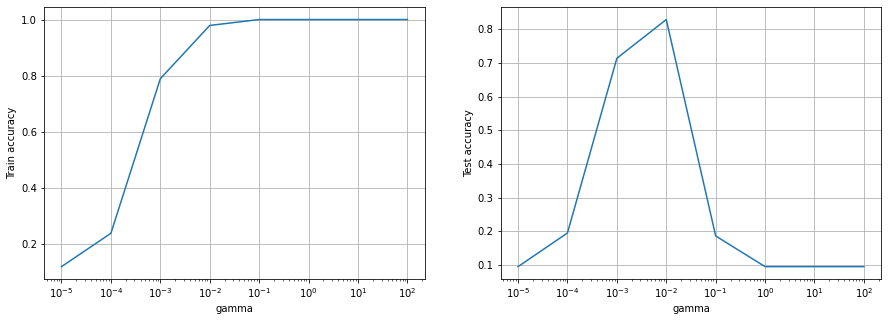

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for val in gamma_values:
    CLF = SVC(kernel = 'rbf', C = 1, gamma = val)
    CLF.fit(X_train, y_train)
    train_acc_list.append(CLF.score(X_train, y_train))
    test_acc_list.append(CLF.score(X_test, y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

We obtain the best performances from our machine learning algorithm for $\gamma = 10^{-2}$. For this value the plots tell us that the train accuracy is almost $100\%$ while the test accuracy is more than $80\%$. For values of $\gamma$ lower than $10^{-2}$, both train ad test accuracy are low and this means that the machine learning algorithm does not well represent training data nor properly predict test data lables. On the contrary, for values of $\gamma$ higher than $10^{-2}$, training data are well fitted by the machine learning algorithm, but test data lables are badly predicted. This kind of problem is recognizable as overfitting.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [210 221 191 187 203 193 200 193 201 201]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(kernel = "rbf", C=10, gamma = 0.01) 
best_SVM.fit(X_train, y_train)
best_SVM.predict(X_test)

training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.116983


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

logreg_no_reg = linear_model.LogisticRegression(C=2**62)
logreg_no_reg.fit(X_train, y_train)
training_error = 1 - logreg_no_reg.score(X_train, y_train)
test_error = 1 - logreg_no_reg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.302224


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
logreg_reg = linear_model.LogisticRegression(C=1)
logreg_reg.fit(X_train, y_train)
training_error = 1 - logreg_reg.score(X_train, y_train)
test_error = 1 - logreg_reg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.002500
Best regularized logistic regression test error: 0.258741


C:\Users\Sebastiano\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 3
Compare and discuss:
- the results from SVM with m=1000 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.

I briefly resume here the results i have obtained from best SVM ($C=10$ and $\gamma=0,01$) in the various cases:

With $m=1000$ i obtained a $training\_error=0,00$ and a $test\_error=0,16$.

With $m=2000$ i obtained a $training\_error=0,00$ and a $test\_error=0,12$.

As we can see, doubling $m$ from $1000$ to $2000$, we obtain slightly better performances on the test set, but at the cost that computation time increases remarkably. Before further increasing the number of training samples, $m$, one should thus consider whether it is worth to increase the computation time in order to obtain such small improvements on the test error.

- the results of SVM and of Logistic Regression

The results obtained through the logistic regression with $m=2000$ are:

For $C=2^{62}$ i obtained a $training\_error=0,00$ and a $test\_error=0,30$.

For $C=1$ i obtained a $training\_error=0,00$ and a $test\_error=0,26$.

Comparing these results with the ones obtained using SVM, we can say that although the comutation time is lower for the logistic regression (even if $m=2000$), we surely obtain better performances on the test set using the SVM.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


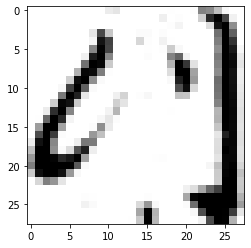

LABEL: 3
Sample number:  19
Correctly classified SVM label:  3
Wrongly classified LR label:  5


In [19]:
LR_prediction = logreg_reg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

LR_MC = LR_prediction != y_test
SVM_CC = SVM_prediction == y_test
intersection = LR_MC * SVM_CC
index = np.where(intersection == True)

#print(X_test[intersection])
plot_input(X_test, y_test, index[0][0])
print("Sample number: ", index[0][0])
#print("Sample features: ", X_test[index[0][0]])
#print("Correct label: ", y_test[index[0][0]])
print("Correctly classified SVM label: ", SVM_prediction[index[0][0]])
print("Wrongly classified LR label: ", LR_prediction[index[0][0]])

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction, labels = labels)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  skm.confusion_matrix(y_test, LR_prediction, labels = labels)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5790 5779 5809 5813 5797 5807 5800 5807 5799 5799]

 Confusion matrix SVM  
 
 [[5439    9    4   19  116   46   11   44   73   29]
 [  22 5158  101   47   99   25  118    2   84  123]
 [   0  168 4704  164  104   39  252   21  218  139]
 [  20   66   61 5377   30  119   15   40   72   13]
 [ 161  162  110   47 4991   36   95   20   87   88]
 [  71   75  100  130   50 5226   36   28   81   10]
 [  23  186  308   30  204   30 4873   76   56   14]
 [ 112   28   50   48  227   57   77 5083   80   45]
 [  40  201   74   62   14   74  181    5 5130   18]
 [  33  175  121   27   74   23    9   23   80 5234]]

 Confusion matrix SVM (normalized)   
 
 [[0.94 0.   0.   0.   0.02 0.01 0.   0.01 0.01 0.01]
 [0.   0.89 0.02 0.01 0.02 0.   0.02 0.   0.01 0.02]
 [0.   0.03 0.81 0.03 0.02 0.01 0.04 0.   0.04 0.02]
 [0.   0.01 0.01 0.92 0.01 0.02 0.   0.01 0.01 0.  ]
 [0.03 0.03 0.02 0.01 0.86 0.01 0.02 0.   0.02 0.02]
 [0.01 0.01 0.02 0.02 0.01 0.9  0.01 0.   0.0

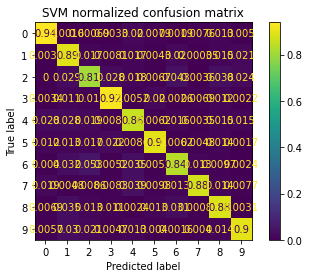

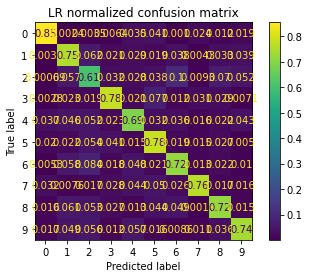

In [21]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
disp_SVM = skm.ConfusionMatrixDisplay(confusion_matrix = (confusion_SVM /counts[:,None]), display_labels = labels)
disp_SVM.plot()
plt.title("SVM normalized confusion matrix")
plt.show()

disp_LR = skm.ConfusionMatrixDisplay(confusion_matrix = (confusion_LR /counts[:,None]), display_labels = labels)
disp_LR.plot()
plt.title("LR normalized confusion matrix")
plt.show()

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

By looking at the SVM normalized confusion matrix, we can see that, in general, the obtained accuracies along the diagonal are high for each label. This means that the algorithm, in the large majority of the cases, well predicts the labels of the test data. Some values on the diagonal of the matrix are lower than others maybe because the algorithm misclassifies some ambiguous characters making confusion between similar characters. By watching outside the diagonal, we can detect the main misclassifications done by the algorithm, like for example between predicted label 1 and true labels 8 and 9 or between predicted label 2 and true label 6, or between predicted label 4 and true labels 6 and 7, excetera...

By looking at the LR normalized confusion matrix, we can see that the the LR algorithm is not working as well as SVM technique for characters classification. In general the number of misclassifications is higher in the whole off diagonal space and the number of correct classifications is significantly lower, indicating a generally worse classification with respect to SVM algorithm, but also a higher confusion between the characters, even the less similar ones.